## Graded Challenge 3

Nama: Nadhifa Safira

Batch HCK 006

Problem Statement: 

``` Menurunkan jumlah kematian pasien selama periode satu tahun kedepan di RS Rares. ```

Objective:

RS Rares ingin mengurangi jumlah kematian dengan memberikan penanganan yang tepat dan sesuai kepada pasien. 


Objective as an analyst:

Dalam rangka memperkirakan kemungkinan kematian seorang pasien berdasarkan data yang tersedia, analis mengimplementasikan teknik Random Forest dan algoritma AdaBoost untuk membangun model klasifikasi.


```
URL: https://huggingface.co/spaces/nadhifarares/DeployGC3
```

## Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging atau 'Bootstrap Aggregating' adalah proses dengan menggunakan beberapa model dari algoritma yang sama dan melatih setiap model pada sampel berbeda dari dataset yang sama.

Cara kerja bagging: 
Bagging dimulai dari pembuatan dataset bootstrap dimana setiap dataset memiliki sample yang acak dengan penggantian dari dataset train, lalu model tersebut dilatih dan di prediksi, data tersebut akan digabungkan secara agregat seperti mengambil rata rata pada umumnya atau bisa juga di lakukannya voting mayoritas. Dengan menggabung prediksi dari model2 yang berbeda, bagging bisa meningkatkan akurasi dan stabilitias prediksi.



2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Analis memilih AdaBoost sebagai algoritma yang dipilih.

Random Forest menggunakan beberapa pohon keputusan yang independen dan menggabungkan hasil prediksi mereka dengan cara voting mayoritas atau rata-rata. Ini menggunakan teknik bagging untuk mengurangi variasi dan overfitting. Sementara itu, AdaBoost memberikan bobot lebih pada sampel yang sulit diprediksi dan membangun model secara adaptif dengan memberikan bobot lebih pada kasus yang salah diklasifikasikan sebelumnya. Prediksi dari semua model dikombinasikan dengan mempertimbangkan bobot yang diberikan pada setiap model berdasarkan performanya.



## Query

```
SELECT * FROM `ftds-hacktiv8-project`.`phase1_ftds_006_hck`.`heart-failure`
```

## Import Library

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import phik
from phik.report import plot_correlation_matrix

#Preprocessing and Modelling
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor



#Save Modelling
import joblib


import warnings
warnings.filterwarnings(action='ignore')


## Data Loading & Overview

In [2]:
df = pd.read_csv('/Users/nadhifarares/Documents/FTDS/GC/GC3/h8dsft_P1G3_nadhifasafira.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [6]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA 

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
#Melihat persebaran data dari pasien yang meninggal.
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Sebanyak 203 pasien berhasil bertahan hidup setelah menjalani perawatan, sementara 96 pasien lainnya meninggal selama masa perawatan.

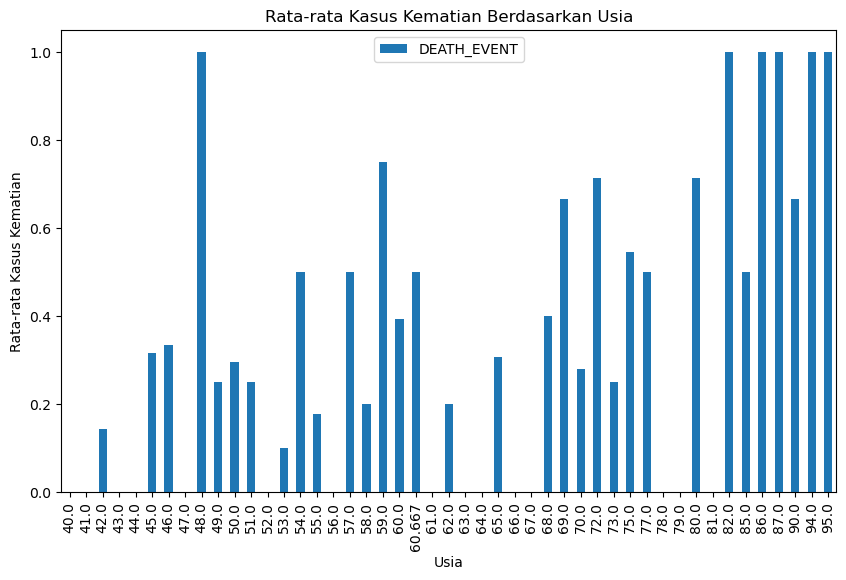

In [11]:
#Melihat persebaran data dari pasien yang meninggal kebanyakan pada umur berapa.
df.groupby('age')[['DEATH_EVENT']].mean().sort_values('age', ascending=True).plot(kind='bar', figsize=(10, 6))

plt.xlabel('Usia')
plt.ylabel('Rata-rata Kasus Kematian')
plt.title('Rata-rata Kasus Kematian Berdasarkan Usia')

plt.show()

Dalam praktiknya, pasien yang mengalami kegagalan penyembuhan atau meninggal cenderung berada dalam rentang usia 48 hingga 95 tahun. Kematian pasien di usia 80 tahun ke atas dianggap wajar karena banyak pasien pada rentang usia ini sudah memiliki kondisi penyakit yang kompleks. Namun, menariknya, melalui analisis grafik, terlihat bahwa terdapat kasus kematian pada pasien di bawah usia 70 tahun selama masa perawatan di rumah sakit. 

In [12]:
#Copy df asli agar data raw tidak berubah2.
df_eda = df.copy()

In [13]:
#Encode agegroup menjadi 2 bagian untuk memudahkan analis
agegroup = []

for age in df_eda['age']:
    if age in [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 60.667, 61.0]:
        agegroup.append('40s to 60s')
    else:
        agegroup.append('60s Above')

df_eda['age_group'] = agegroup


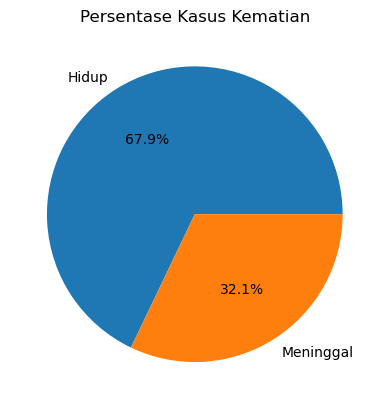

In [14]:
# Melihat persentase kematian
# Menghitung jumlah nilai unik dalam kolom kematian

dead_counts = df_eda['DEATH_EVENT'].value_counts()

# Membuat pie chart
labels = ['Hidup', 'Meninggal']  # Tambahkan label untuk memperjelas arti 0 dan 1
plt.pie(dead_counts.values, labels=labels, autopct='%1.1f%%')

# Menambahkan judul
plt.title('Persentase Kasus Kematian')

# Menampilkan pie chart
plt.show()


Dalam perawatan, sebanyak 32% pasien mengalami kematian, sementara 67.9% berhasil selamat dan pulih kembali.

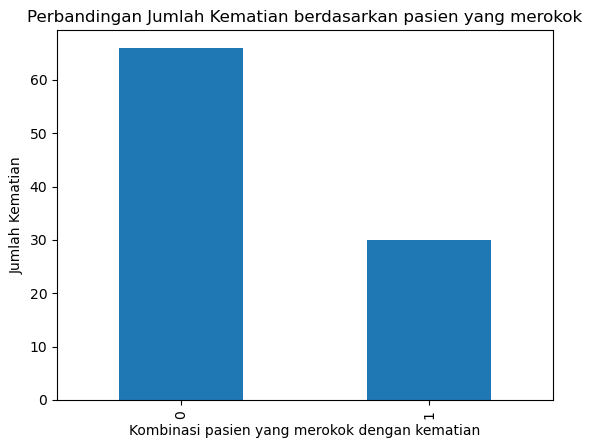

In [15]:
#Ingin mengetahui apakah ada banyak yang meninggal dikarenakan merokok
smoke = df.groupby(['smoking'])['DEATH_EVENT'].sum()

# Membuat plot
smoke.plot(kind='bar')
plt.xlabel('Kombinasi pasien yang merokok dengan kematian')
plt.ylabel('Jumlah Kematian')
plt.title('Perbandingan Jumlah Kematian berdasarkan pasien yang merokok')
plt.show()

Data menunjukkan bahwa terdapat beberapa orang yang merokok banyak dan tetap memiliki status "0" atau masih sehat. Hal ini menunjukkan bahwa merokok sendiri tidak selalu menjadi satu-satunya faktor yang menyebabkan kematian seseorang. Namun, perlu diingat bahwa meskipun ada individu yang terlihat sehat meskipun merokok, tetap ada risiko kesehatan yang signifikan yang terkait dengan kebiasaan merokok.

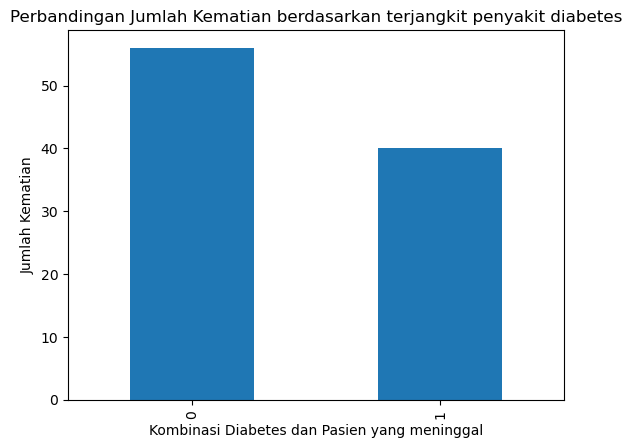

In [16]:
#Ingin mengetahui apakah diabetes memengaruhi kematian
smoke = df.groupby(['diabetes'])['DEATH_EVENT'].sum()

# Membuat plot
smoke.plot(kind='bar')
plt.xlabel('Kombinasi Diabetes dan Pasien yang meninggal')
plt.ylabel('Jumlah Kematian')
plt.title('Perbandingan Jumlah Kematian berdasarkan terjangkit penyakit diabetes')
plt.show()

Dari data yang ada, terlihat bahwa diabetes juga merupakan salah satu faktor yang berkontribusi pada kematian pasien di RS Rares. Diabetes adalah kondisi kronis yang ditandai oleh peningkatan kadar glukosa (gula) dalam darah. Jika diabetes tidak dikendalikan dengan baik, dapat menyebabkan komplikasi serius dan berpotensi mengancam jiwa. Pasien dengan diabetes memiliki risiko yang lebih tinggi untuk mengalami masalah kesehatan yang serius, seperti penyakit jantung, stroke, gagal ginjal, gangguan pembuluh darah, dan infeksi. Kondisi-kondisi ini dapat menjadi faktor yang memperburuk kondisi pasien yang sudah rentan dan berkontribusi pada risiko kematian.

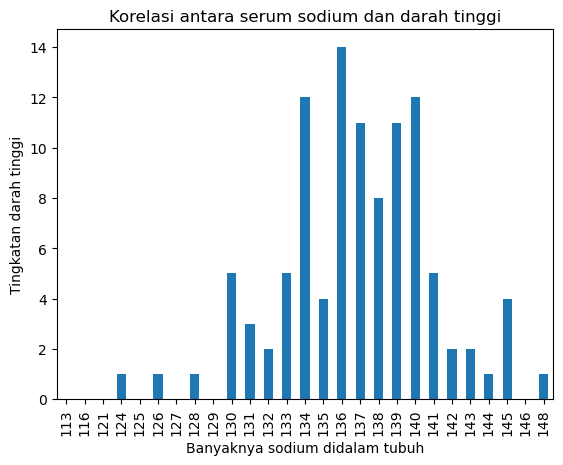

In [17]:
#Ingin mengetahui apakah ada korelasi diantara serum sodium dan darah tinggi?
smoke = df.groupby(['serum_sodium'])['high_blood_pressure'].sum()

# Membuat plot
smoke.plot(kind='bar')
plt.xlabel('Banyaknya sodium didalam tubuh')
plt.ylabel('Tingkatan darah tinggi')
plt.title('Korelasi antara serum sodium dan darah tinggi')
plt.show()

Terbukti bahwa kadar garam yang tinggi dalam tubuh dapat berpengaruh pada peningkatan tekanan darah. Pada normalnya konsentrasi normal natrium dalam darah (serum sodium) berkisar antara 135 hingga 145 milimol per liter (mmol/L). Rentang ini umumnya dianggap sebagai tingkatan normal untuk kebanyakan orang dewasa. Penting juga untuk menyadari bahwa kadar sodium yang sangat rendah (hiponatremia) atau tinggi (hipernatremia) dapat menjadi tanda masalah kesehatan yang serius. Walaupun dari data ada beberapa yang hiponatermia dan hipernatremia tetapi kebanyakan pasien masih berada di rentang kadar normal.

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


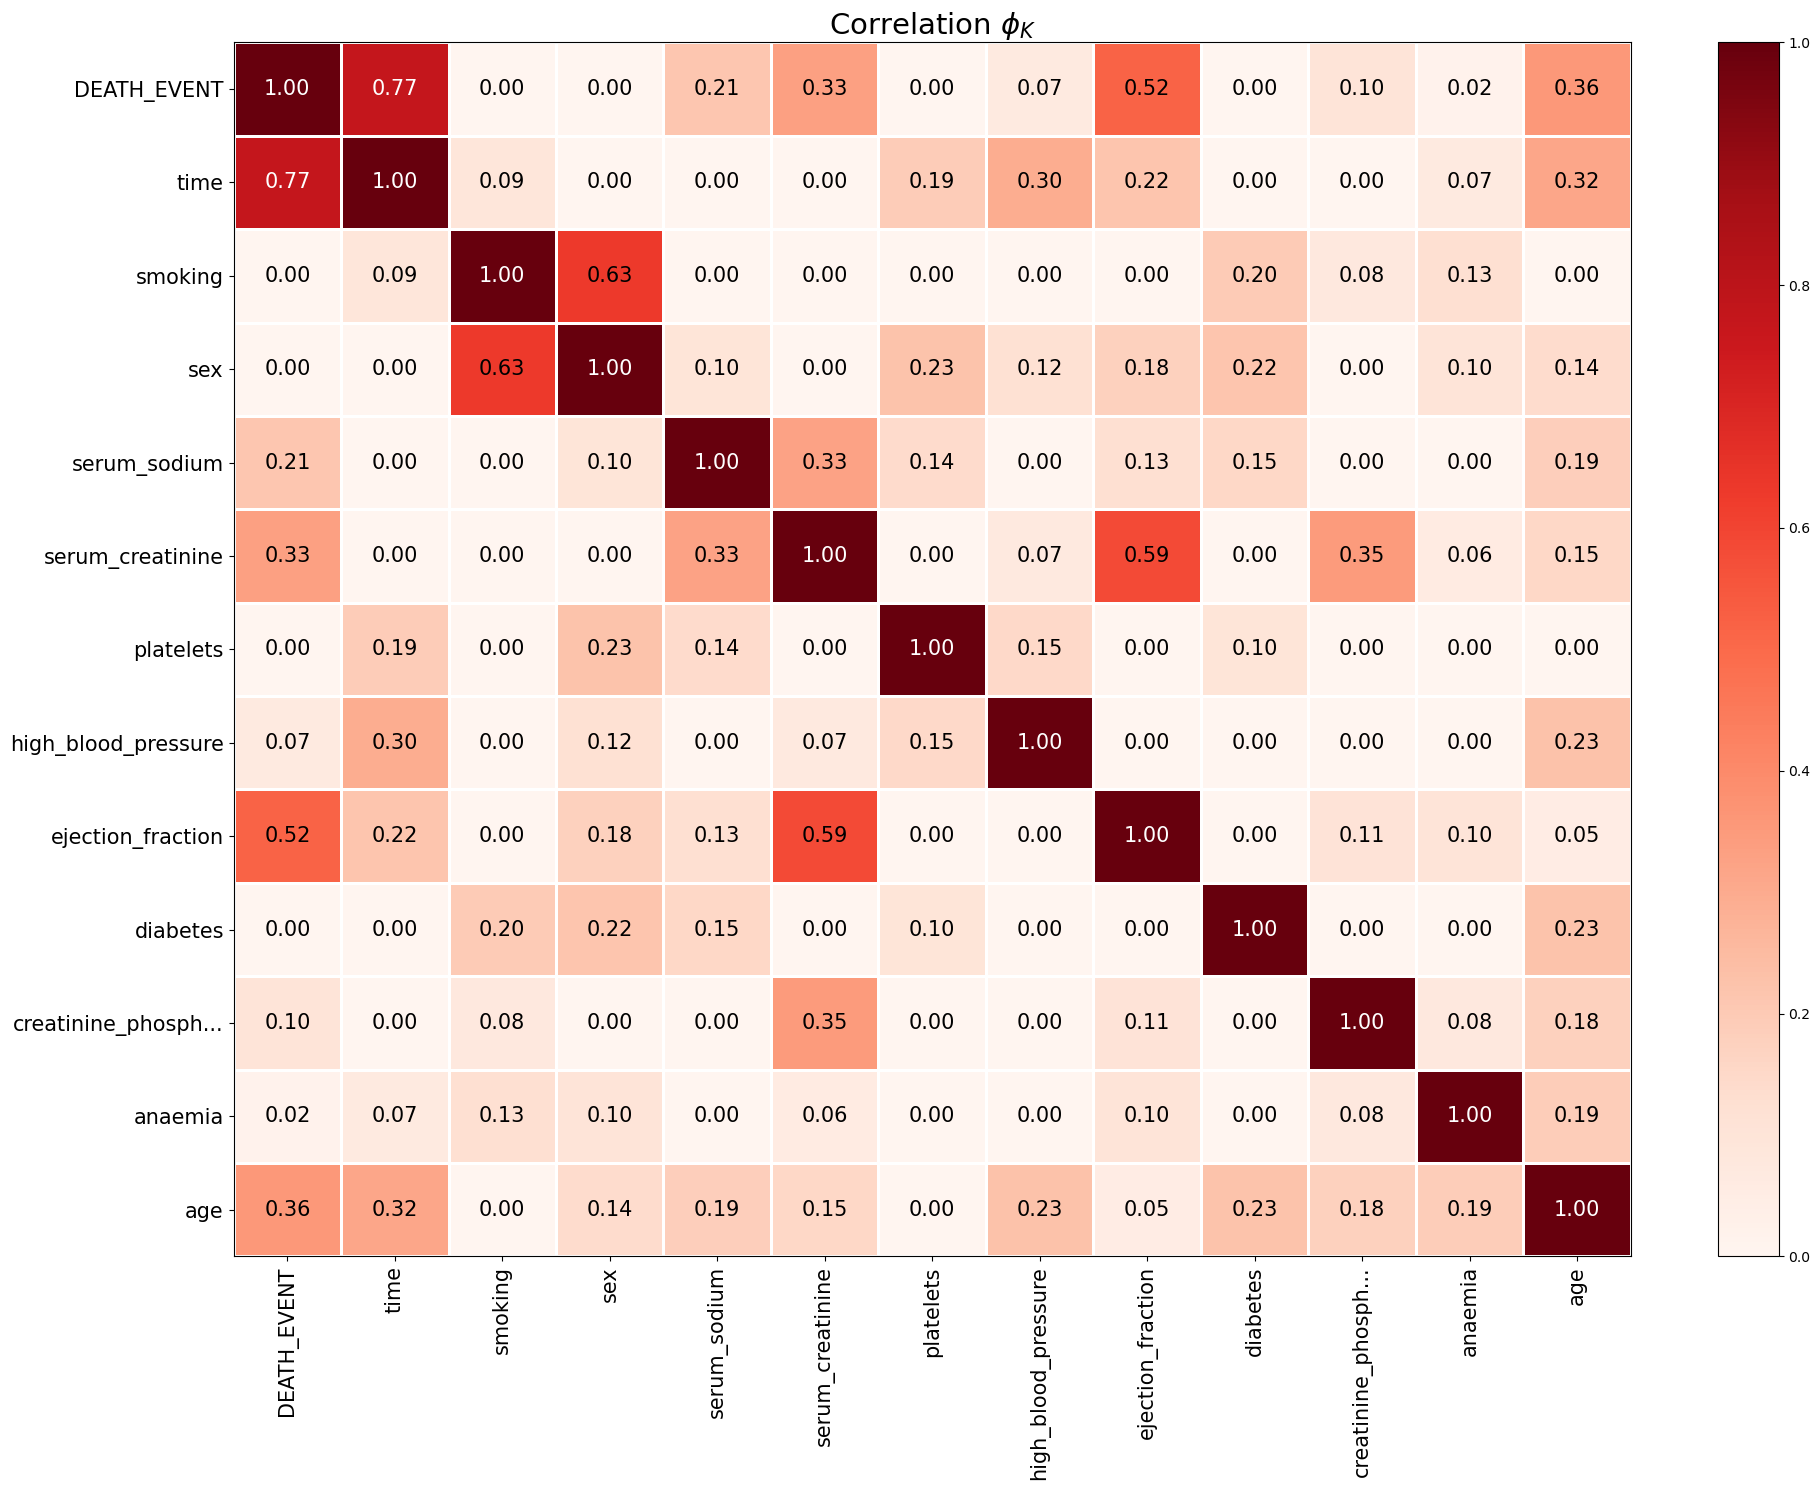

In [18]:
#Fitur fitur apa saja yang memiliki korelasi terbesar dengan target = death events.
plot_correlation_matrix(df.phik_matrix().values, 
                        x_labels=df.phik_matrix().columns, 
                        y_labels=df.phik_matrix().index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"Correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


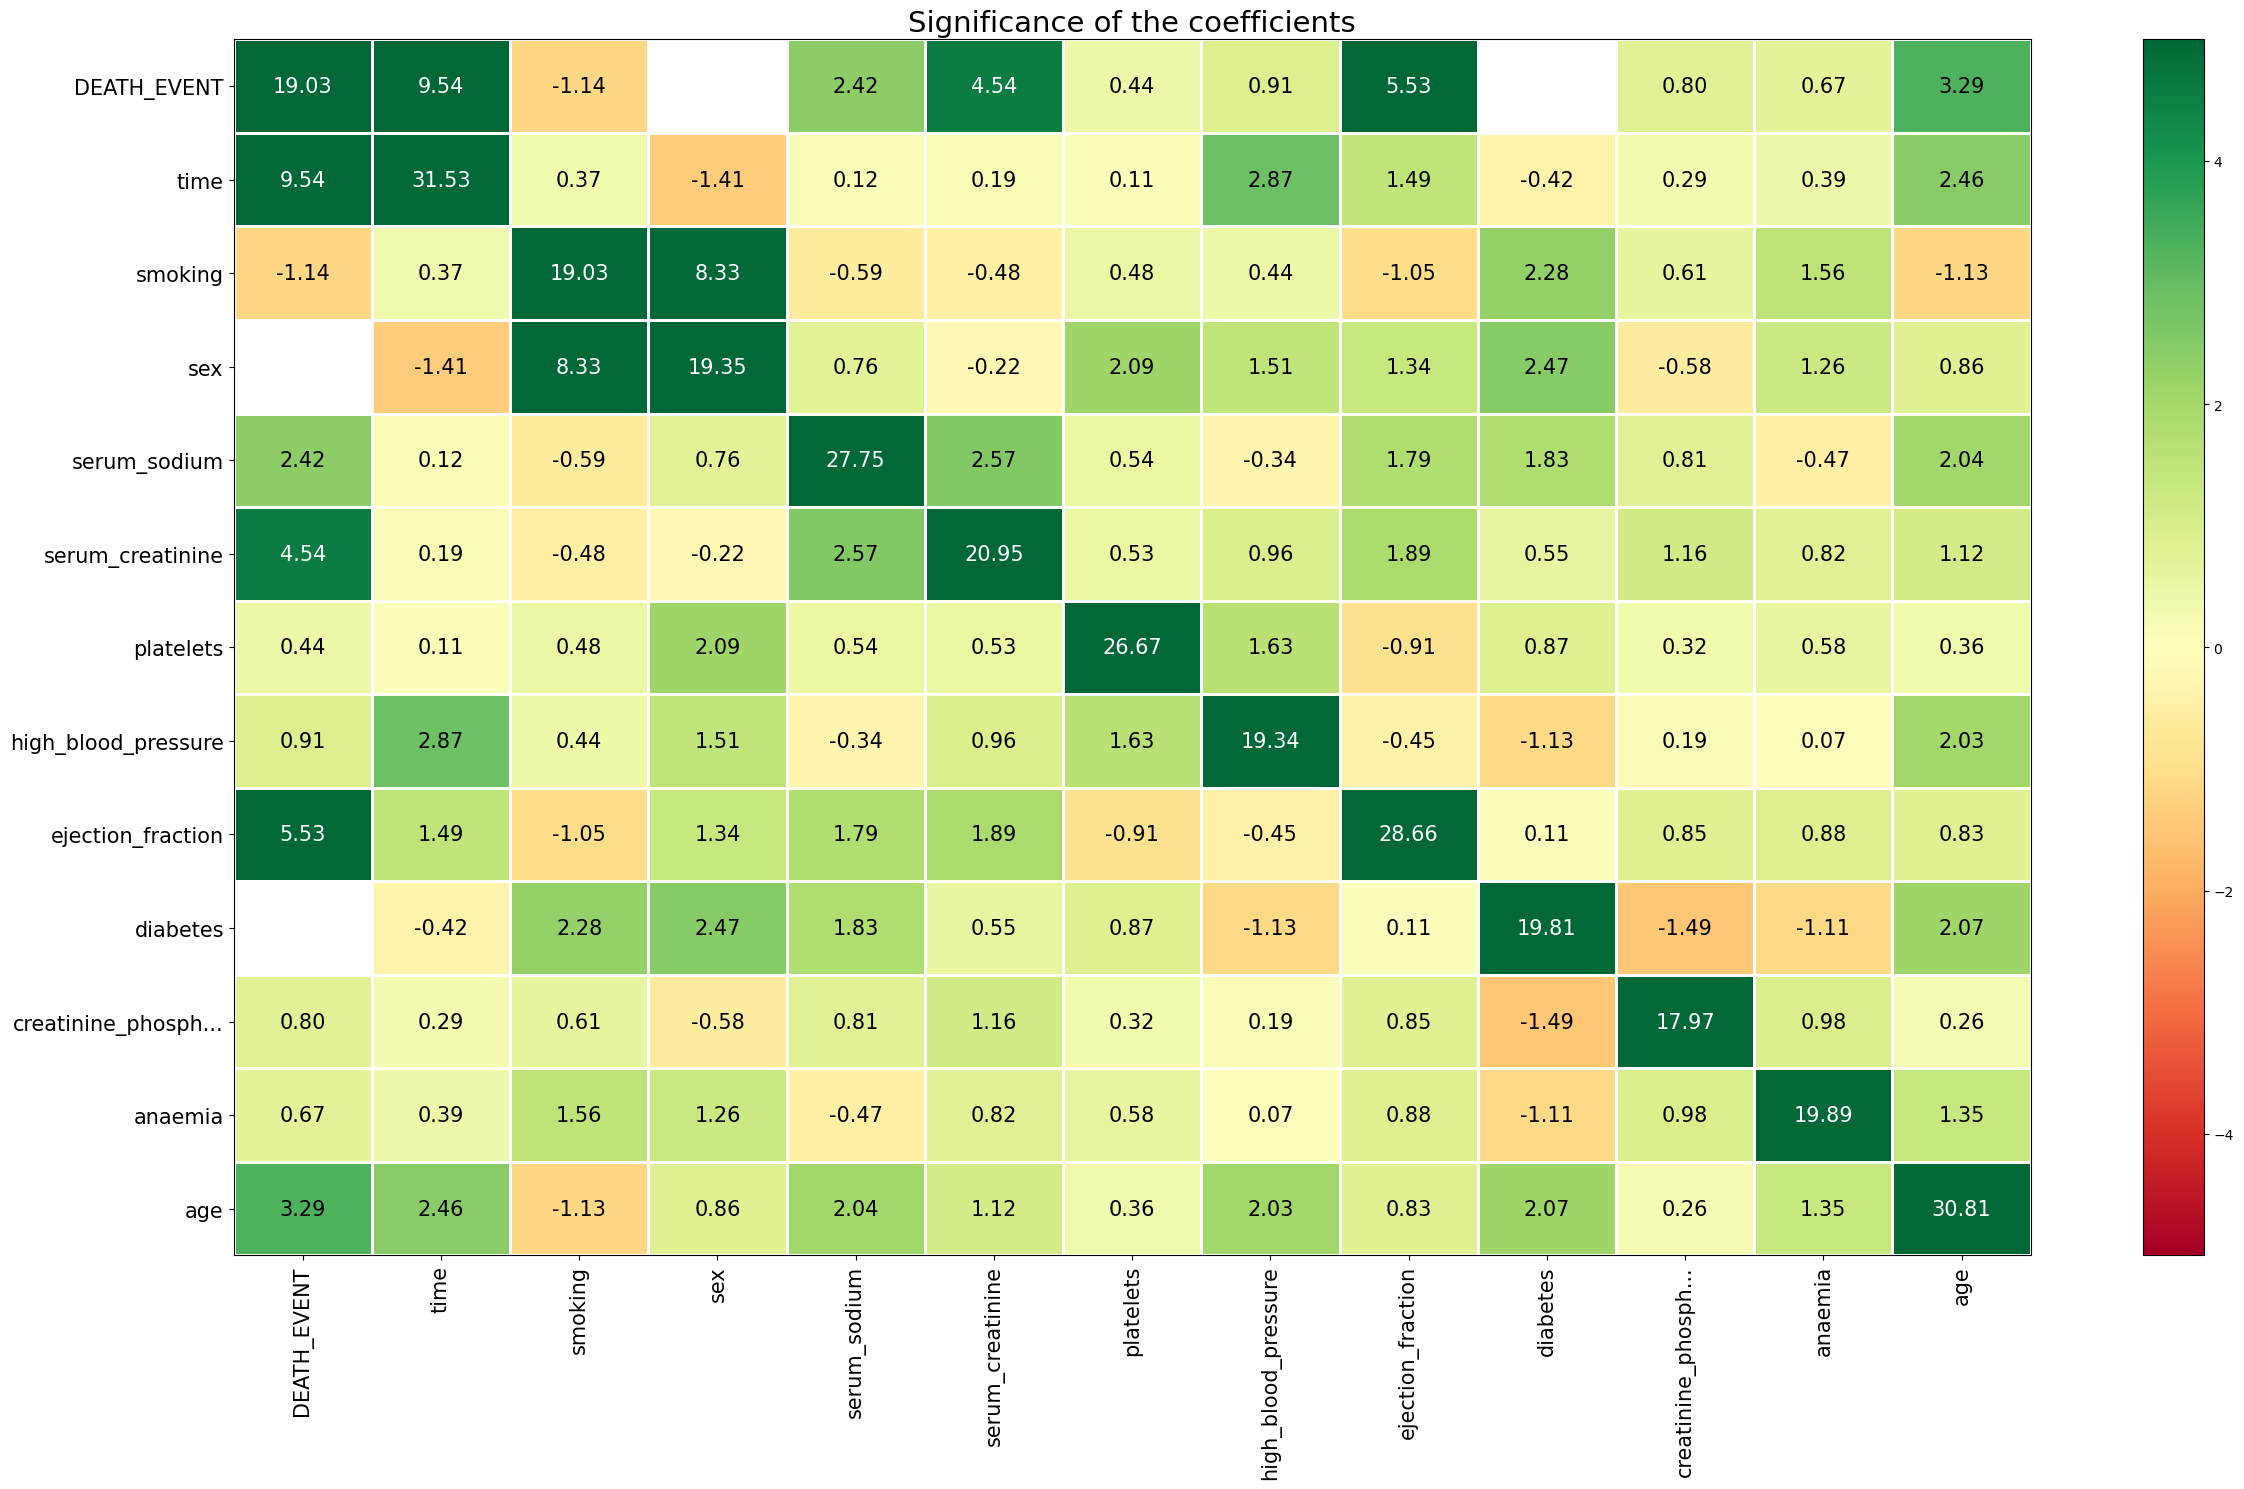

In [19]:
significance_overview = df.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(25, 15))
plt.tight_layout()

Terlihat dari significance of the coefficience, 'age', 'time', 'ejection_fraction', 'serum_cretanine', 'serum_sodium' adalah faktor-faktor yang paling berpengaruh terhadap meninggalnya pasien. Awalnya, dalam analisis tersebut diasumsikan bahwa merokok mungkin juga menjadi salah satu faktor yang paling berkorelasi dengan pasien yang meninggal. Namun, setelah melihat data, terungkap bahwa merokok justru memiliki hubungan terbalik dengan pasien yang meninggal. Bahkan, terlihat bahwa lebih banyak orang yang tidak merokok yang meninggal dibandingkan mereka yang merokok.

## Feature Selection

In [20]:
#Memilih kolom-kolom baru berdasarkan korelasi tertinggi.
df_select = df[['age', 'time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium','DEATH_EVENT']]
df_select

,age,time,ejection_fraction,serum_creatinine,serum_sodium,DEATH_EVENT
0,42.0,65,15,1.3,136,1
1,46.0,100,17,2.1,124,1
2,65.0,8,20,2.7,116,1
3,53.0,43,20,1.4,139,1
4,50.0,186,20,1.0,134,0
...,...,...,...,...,...,...
294,63.0,147,60,1.2,145,0
295,45.0,186,60,1.0,136,0
296,70.0,186,60,0.9,138,0
297,53.0,215,60,1.0,139,0


In [21]:
#Melihat isi jumlah data dari masing2 kolom
df_select.nunique()

age                   47
time                 148
ejection_fraction     17
serum_creatinine      40
serum_sodium          27
DEATH_EVENT            2
dtype: int64

In [22]:
df_select.isnull().sum()

age                  0
time                 0
ejection_fraction    0
serum_creatinine     0
serum_sodium         0
DEATH_EVENT          0
dtype: int64

Tidak terdapat missing values pada dataframe.

In [23]:
df_select.describe()

,age,time,ejection_fraction,serum_creatinine,serum_sodium,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,130.260870,38.083612,1.39388,136.625418,0.32107
std,11.894809,77.614208,11.834841,1.03451,4.412477,0.46767
min,40.000000,4.000000,14.000000,0.50000,113.000000,0.00000
25%,51.000000,73.000000,30.000000,0.90000,134.000000,0.00000
50%,60.000000,115.000000,38.000000,1.10000,137.000000,0.00000
75%,70.000000,203.000000,45.000000,1.40000,140.000000,1.00000
max,95.000000,285.000000,80.000000,9.40000,148.000000,1.00000


Insight:
1. Rata-rata waktu pasien dirawat di RS Rares adalah 130 jam.
2. Rentang usia pasien RS Dhifa berada di umur 40 hingga 95.
3. Rata-rata persentase darah yang keluar setiap pemompaan jantung berada di sekitar 38% yang dimana normalnya adalah 50 - 70%
4. Kadar natrium dalam tubuh pasien rata rata berkisar di 136, yang merupakan kadar normal untuk kadar serum sodium pada tubuh manusia.
5. Kadar serum creatinine pasien RS rares berada di kisaran 1,3 yang dimana untuk pria normalnya sekitar 0,6 hingga 1,2 miligram per desiliter (mg/dL) dan untuk wanita normalnya di sekitar 0,5 hingga 1,1 mg/dL.

### Memeriksa Outlier

In [24]:
#Melihat persebaran data-nya
def diagnostic_plots(df_select, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_select[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_select[variable])
    plt.title('Boxplot')

    plt.show()

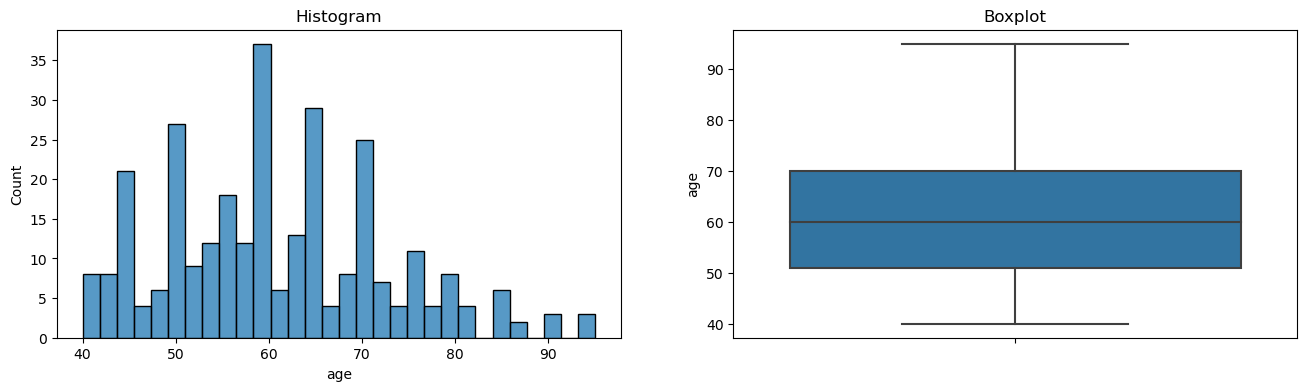


Skewness Value :  0.4230619067286355


In [25]:
#Melakukan pengecekan apakah ada data anomali pada kolom numerikal - Age 
diagnostic_plots(df_select, 'age')
print('\nSkewness Value : ', df_select['age'].skew())

Tidak terdapat outlier pada kolom Age.

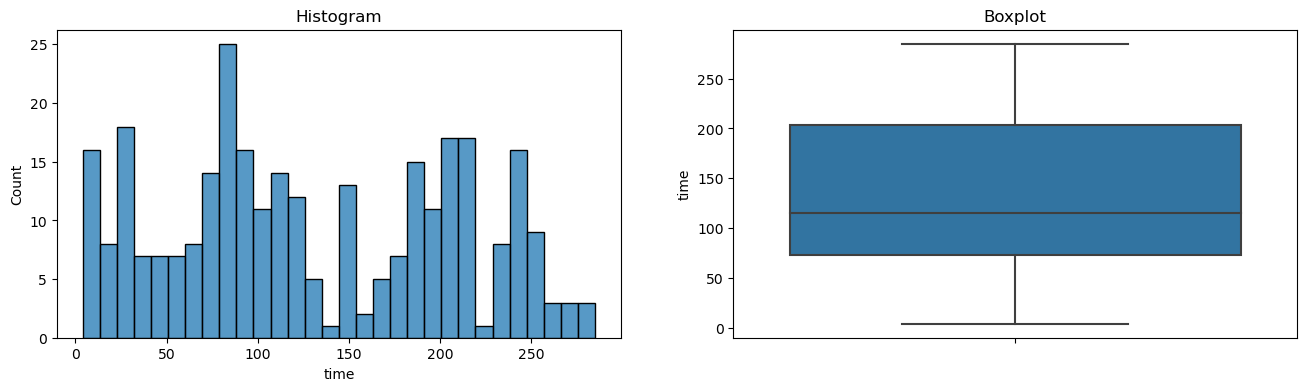


Skewness Value :  0.12780264559841178


In [26]:
#Time - Analis menjadikan ini sebagai fitur
diagnostic_plots(df_select, 'time')
print('\nSkewness Value : ', df_select['time'].skew())

Tidak terdapat outlier pada kolom Time. 

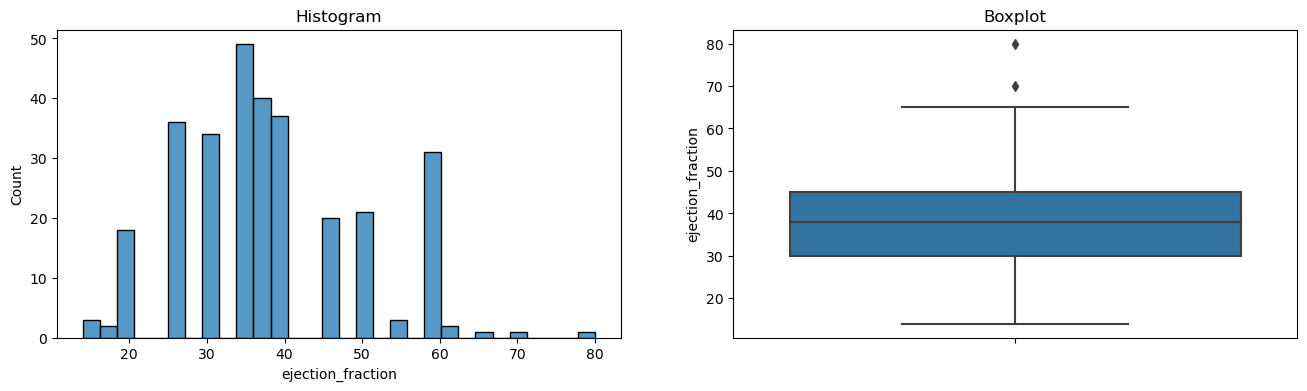


Skewness Value :  0.5553827516973213


In [27]:
#Ejection Fraction - Analis menjadikan ini sebagai fitur
diagnostic_plots(df_select, 'ejection_fraction')
print('\nSkewness Value : ', df_select['ejection_fraction'].skew())

Terdapat sedikit outlier pada kolom ejection_fraction, dan persebaran data terdistribusi normal.

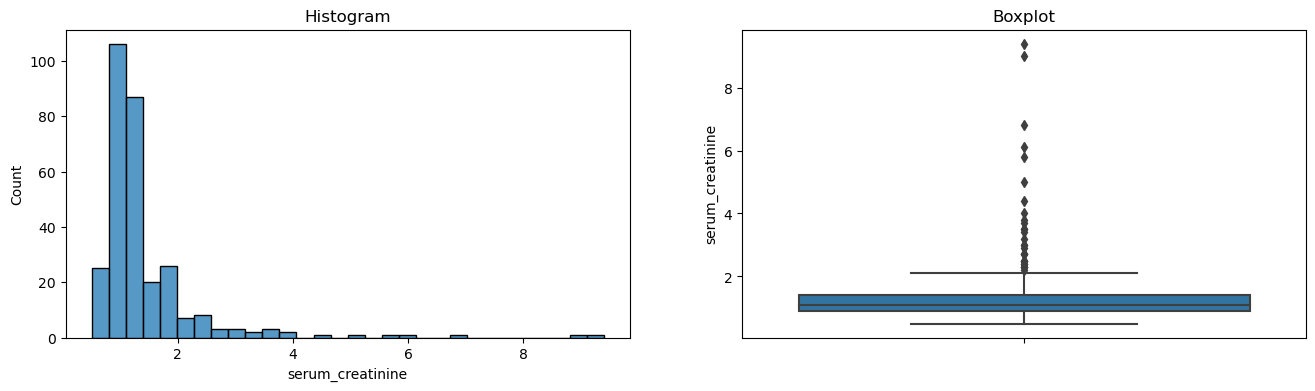


Skewness Value :  4.455995882049029


In [28]:
#Serum Creatinine - Analis menjadikan ini sebagai fitur
diagnostic_plots(df_select, 'serum_creatinine')
print('\nSkewness Value : ', df_select['serum_creatinine'].skew())

Terdapat banyak outlier yang extreme ada kolom serum_creatinine, dan persebaran data terdistribusi skew kekanan.

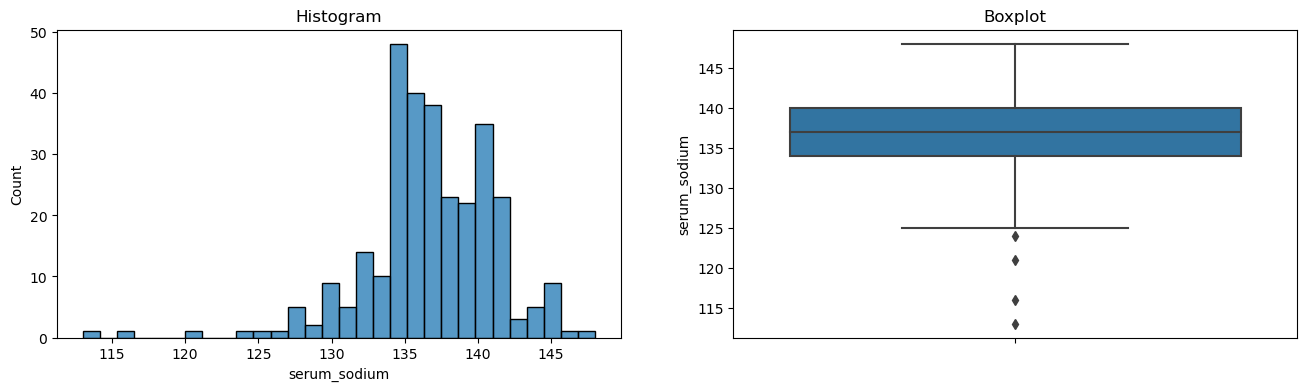


Skewness Value :  -1.0481360160574988


In [29]:
#Serum Sodium
diagnostic_plots(df_select, 'serum_sodium')
print('\nSkewness Value : ', df_select['serum_sodium'].skew())

Terdapat banyak outlier pada kolom serum_sodium.

### VIF

In [30]:
#Kalkulasi VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

#Melihat multikolineritas dari fitur-fitur.
calc_vif(df_select[['time','ejection_fraction', 'serum_creatinine']])


,variables,VIF
0,time,3.170132
1,ejection_fraction,4.469005
2,serum_creatinine,2.417210


Akhirnya analis akan menggunakan kolom 'time', 'ejection_fraction' dan 'serum_creatinine' sebagai fitur yang akan di uji dengan model karena VIF-nya berada di bawah 5 semua, analis sudah bisa melanjutkan split data.

In [31]:
#Fitur fitur yang akan dipake untuk menguji model
df_fix = df[['time', 'ejection_fraction', 'serum_creatinine','DEATH_EVENT']]
df_fix

,time,ejection_fraction,serum_creatinine,DEATH_EVENT
0,65,15,1.3,1
1,100,17,2.1,1
2,8,20,2.7,1
3,43,20,1.4,1
4,186,20,1.0,0
...,...,...,...,...
294,147,60,1.2,0
295,186,60,1.0,0
296,186,60,0.9,0
297,215,60,1.0,0


### Split

In [32]:
# Split antara x = fitur dan y = target

X = df_fix.drop('DEATH_EVENT', axis=1)
y = df_fix['DEATH_EVENT']
X

,time,ejection_fraction,serum_creatinine
0,65,15,1.3
1,100,17,2.1
2,8,20,2.7
3,43,20,1.4
4,186,20,1.0
...,...,...,...
294,147,60,1.2
295,186,60,1.0
296,186,60,0.9
297,215,60,1.0


In [33]:
#melihat shape dari train size dan test size
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (224, 3)
Test Size  :  (75, 3)


In [34]:
y_train.value_counts() #Persebaran data Y_train

0    152
1     72
Name: DEATH_EVENT, dtype: int64

Terdapat data yang imbalance.

In [35]:
X_train.isnull().sum() #Memastikan tidak ada MV

time                 0
ejection_fraction    0
serum_creatinine     0
dtype: int64

Tidak ada missing values.

## Pre-Process

In [36]:
#Jalur pipeline Numerikal Pertama

num_pipe1 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])

#fit transform pipeline numerikal
num1_tr = num_pipe1.fit_transform(X_train[['time','ejection_fraction']])
num1_tr

array([[-0.70398967, -0.21021293],
       [-0.55559113, -0.21021293],
       [-1.5379535 ,  1.79844461],
       [-0.79842511, -0.21021293],
       [ 0.30781857, -1.20238014],
       [ 0.52367099, -1.20238014],
       [-0.70398967,  1.27803787],
       [ 1.10377438,  0.08743723],
       [-0.46115569,  1.27803787],
       [ 1.52198845, -0.21021293],
       [ 0.83395885, -0.70629654],
       [ 0.99584817,  1.79844461],
       [ 1.55132382,  0.08743723],
       [-1.40551005,  0.08743723],
       [-0.32624793, -0.21021293],
       [ 0.87443118,  1.27803787],
       [-0.31275715, -0.70629654],
       [ 1.55132382,  0.28587067],
       [-0.73097122, -1.20238014],
       [-1.5379535 , -0.70629654],
       [ 0.94188506, -1.20238014],
       [ 1.06330205, -0.70629654],
       [-1.45947315,  0.08743723],
       [ 0.65857875, -0.70629654],
       [ 0.92839428,  1.27803787],
       [ 1.55132382,  0.08743723],
       [-1.39201927,  0.78195427],
       [-1.18965762, -1.66609161],
       [-0.58257268,

Analis menggunakan methode capping Winsorizer: 'Gaussian' karena distribusi pada kolom 'time' dan 'ejection_fraction' merupakan distribusi normal dan fold=1.5 karena data outlier tidak terlalu ekstrem, dan jika distribusi data tersebut normal maka untuk scaling analis menggunakan StandardScaler. 

In [37]:
#Jalur pipeline Numerikal Kedua

num_pipe2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())  
    ])

#fit transform pipeline numerikal
num2_tr = num_pipe2.fit_transform(X_train[['serum_creatinine']])
num2_tr

array([[0.2  ],
       [0.24 ],
       [0.36 ],
       [0.16 ],
       [0.24 ],
       [0.24 ],
       [0.04 ],
       [0.48 ],
       [0.28 ],
       [0.16 ],
       [0.4  ],
       [0.32 ],
       [0.12 ],
       [0.492],
       [0.232],
       [0.12 ],
       [0.08 ],
       [0.16 ],
       [0.76 ],
       [0.2  ],
       [0.08 ],
       [0.24 ],
       [0.52 ],
       [0.232],
       [0.2  ],
       [0.24 ],
       [0.96 ],
       [0.32 ],
       [0.28 ],
       [0.24 ],
       [0.08 ],
       [0.08 ],
       [0.16 ],
       [0.   ],
       [0.76 ],
       [1.   ],
       [1.   ],
       [0.16 ],
       [0.12 ],
       [0.08 ],
       [0.12 ],
       [0.16 ],
       [0.48 ],
       [0.2  ],
       [1.   ],
       [1.   ],
       [0.24 ],
       [0.2  ],
       [0.44 ],
       [0.12 ],
       [0.08 ],
       [0.492],
       [1.   ],
       [0.16 ],
       [0.28 ],
       [0.24 ],
       [0.12 ],
       [0.4  ],
       [0.72 ],
       [0.84 ],
       [1.   ],
       [1.   ],
       [

Pada penangangan kali ini analis menggunakan methode capping Winsorizer: 'IQR' karena distribusi pada kolom 'serum_creatinine' merupakan distribusi skew dan menggunakan fold=3 karena outliernya termasuk ekstrem, dan jika distribusi data tersebut skew maka untuk scaling analis menggunakan MinMaxScaler. 

In [38]:
#Menggabungkan kedua jalur pipeline menggunakan Column Transformer.

full_pipe = ColumnTransformer([
        ("num_gau", num_pipe1, ['time','ejection_fraction']),
        ("num_iqr", num_pipe2, ['serum_creatinine'])])

train_tr = full_pipe.fit_transform(X_train)
train_tr

array([[-0.70398967, -0.21021293,  0.2       ],
       [-0.55559113, -0.21021293,  0.24      ],
       [-1.5379535 ,  1.79844461,  0.36      ],
       [-0.79842511, -0.21021293,  0.16      ],
       [ 0.30781857, -1.20238014,  0.24      ],
       [ 0.52367099, -1.20238014,  0.24      ],
       [-0.70398967,  1.27803787,  0.04      ],
       [ 1.10377438,  0.08743723,  0.48      ],
       [-0.46115569,  1.27803787,  0.28      ],
       [ 1.52198845, -0.21021293,  0.16      ],
       [ 0.83395885, -0.70629654,  0.4       ],
       [ 0.99584817,  1.79844461,  0.32      ],
       [ 1.55132382,  0.08743723,  0.12      ],
       [-1.40551005,  0.08743723,  0.492     ],
       [-0.32624793, -0.21021293,  0.232     ],
       [ 0.87443118,  1.27803787,  0.12      ],
       [-0.31275715, -0.70629654,  0.08      ],
       [ 1.55132382,  0.28587067,  0.16      ],
       [-0.73097122, -1.20238014,  0.76      ],
       [-1.5379535 , -0.70629654,  0.2       ],
       [ 0.94188506, -1.20238014,  0.08 

In [39]:
#Fit transform Test model
test_tr = full_pipe.transform(X_test)
test_tr

array([[-0.77144355,  0.78195427,  0.12      ],
       [-0.65002657,  1.79844461,  0.16      ],
       [-0.69049889,  0.78195427,  0.16      ],
       [ 0.73952341,  0.78195427,  0.04      ],
       [-0.77144355,  0.08743723,  0.        ],
       [ 1.53547923,  0.08743723,  0.24      ],
       [-0.48813725, -0.70629654,  0.12      ],
       [ 1.53547923, -0.21021293,  0.2       ],
       [-0.32624793,  0.78195427,  1.        ],
       [ 1.55132382, -0.21021293,  0.32      ],
       [-1.47296393,  1.79844461,  0.08      ],
       [-0.79842511,  1.27803787,  0.28      ],
       [ 1.02282972, -0.70629654,  0.44      ],
       [-1.17616685,  1.27803787,  0.16      ],
       [-1.5379535 , -1.20238014,  0.12      ],
       [ 0.57763409,  0.78195427,  0.12      ],
       [-0.16435861, -0.21021293,  0.232     ],
       [ 1.06330205,  0.28587067,  0.16      ],
       [-1.2031484 , -0.70629654,  0.16      ],
       [-0.62304501, -1.20238014,  0.24      ],
       [-0.59606346,  0.78195427,  0.232

## Model Evaluation

In [40]:
#Identifikasi model
rfc = RandomForestClassifier(random_state=0)
ab = AdaBoostClassifier()

In [41]:
#Menggunakan skfold untuk menghandle data imbalance

skfold = StratifiedKFold(5)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.99      0.99        72

    accuracy                           1.00       224
   macro avg       1.00      0.99      0.99       224
weighted avg       1.00      1.00      1.00       224

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.86      0.79      0.83        24

    accuracy                           0.89        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



Confusion Matrix Random Forrest    : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x13b0991b0>


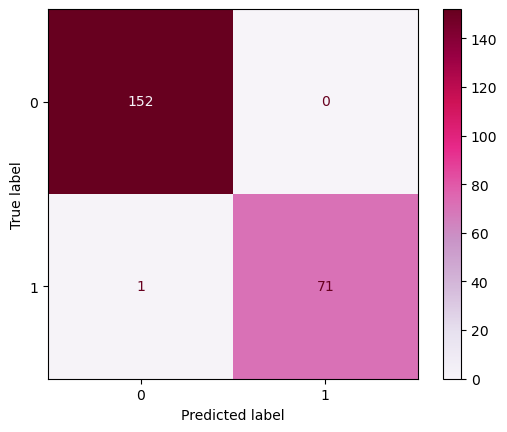

In [42]:
#RandomForestClassifier

rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

#Confussion matrix display
print('Confusion Matrix Random Forrest    :', ConfusionMatrixDisplay.from_estimator(rfc, train_tr, y_train, cmap='PuRd'))

In [43]:
# Save classification report menjadi dictionary - Random Forest Classifier

report_rfc= {}
score_reports_rfc = {
    'train - precision' : precision_score(y_train, rfc_train),
    'train - recall' : recall_score(y_train, rfc_train),
    'train - accuracy' : accuracy_score(y_train, rfc_train),
    'train - f1_score' : f1_score(y_train, rfc_train),
    'test - precision' : precision_score(y_test, rfc_test),
    'test - recall' : recall_score(y_test, rfc_test),
    'test - accuracy_score' : accuracy_score(y_test, rfc_test),
    'test - f1_score' : f1_score(y_test, rfc_test),}
report_rfc['Baseline (Default Hyperparameter)'] = score_reports_rfc
pd.DataFrame(report_rfc)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.893333
test - f1_score,0.826087
test - precision,0.863636
test - recall,0.791667
train - accuracy,0.995536
train - f1_score,0.993007
train - precision,1.000000
train - recall,0.986111


In [44]:
#Cross-validation - RFC
rfc_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', RandomForestClassifier(random_state=0))
    ])

scores_precision__rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="precision", cv=skfold)
                         
print(scores_precision__rfc)
print(scores_precision__rfc.mean())

[0.77777778 0.92857143 0.75       0.73333333 0.76923077]
0.7917826617826618


Analis menggunakan precision sebagai matrix pembanding karena analis ingin meminimalisir false positive-nya, yang dalam konteks ini false positive analis merupakan 'Pasien yang belum meninggal tetapi di labelkan Meninggal.' Ini sangat fatal untuk pihak RS karena dengan tidak keakuratan data ini RS Rares bisa mendapatkan kerugian yang sangat signifikan.

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       152
           1       0.87      0.75      0.81        72

    accuracy                           0.88       224
   macro avg       0.88      0.85      0.86       224
weighted avg       0.88      0.88      0.88       224

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        51
           1       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.90        75

Confusion Matrix AdaBoost   : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x13fe76980>


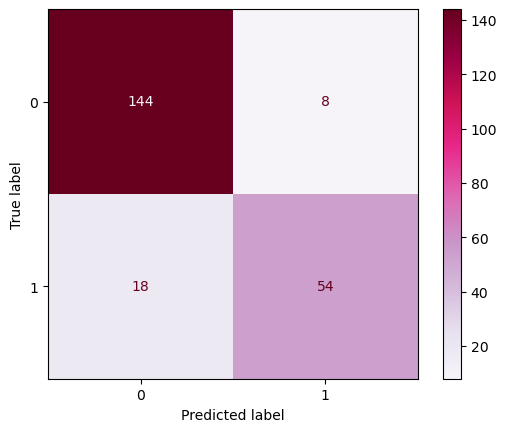

In [45]:
#AdaBoost

ab.fit(train_tr, y_train)

ab_train = ab.predict(train_tr)
ab_test = ab.predict(test_tr)

print(classification_report(y_train, ab_train))
print(classification_report(y_test, ab_test))

#Confussion matrix display
print('Confusion Matrix AdaBoost   :', ConfusionMatrixDisplay.from_estimator(ab, train_tr, y_train, cmap='PuRd'))

In [46]:
# Save classification report menjadi dictionary - AdaBoost

report_ab= {}
score_reports_ab = {
    'train - precision' : precision_score(y_train, ab_train),
    'train - recall' : recall_score(y_train, ab_train),
    'train - accuracy' : accuracy_score(y_train, ab_train),
    'train - f1_score' : f1_score(y_train, ab_train),
    'test - precision' : precision_score(y_test, ab_test),
    'test - recall' : recall_score(y_test, ab_test),
    'test - accuracy_score' : accuracy_score(y_test, ab_test),
    'test - f1_score' : f1_score(y_test, ab_test),}
report_ab['Baseline (Default Hyperparameter)'] = score_reports_ab
pd.DataFrame(report_ab)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.906667
test - f1_score,0.844444
test - precision,0.904762
test - recall,0.791667
train - accuracy,0.883929
train - f1_score,0.805970
train - precision,0.870968
train - recall,0.750000


In [47]:
#Cross-validation - AdaBoost    benerin
ab_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', AdaBoostClassifier(random_state=0))
    ])

scores_precision_ab = cross_val_score(ab_pipe, X_train, y_train,
                         scoring="precision", cv=skfold)
                         
print(scores_precision_ab)
print(scores_precision_ab.mean())

[0.8        0.83333333 0.69230769 0.625      0.71428571]
0.732985347985348


Analis menggunakan model Random Forest serta AdaBoost untuk membandingkan model mana yang memiliki skor tertinggi perihal skor presisi, dapat dilihat bahwa model Random Forest memiliki tingkat keakurasian lebih tinggi daripada AdaBoost maka dari itu analis memilih Random Forest sebagai model untuk di hyperparameter tuning dan diuji prediksi.

### Hyperparameter Tuning

In [48]:
#Pipeline preprocess + model - RFC (Model yang dipilih)
rfc_pipe = Pipeline([
        ('preprocess', full_pipe),
        ('model', RandomForestClassifier(random_state=0))
    ])

# hyperparameter tuning combination
params = [
    {'model__n_estimators': [50, 70, 90],          
     'model__max_features': [2, 3],                 
     'model__max_depth': [3, 5, 7, 9, 12, None],   
     'model__criterion': ['gini', 'entropy']},   
  ]

grid_search = GridSearchCV(rfc_pipe, params, cv=skfold,
                           scoring='precision',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_gau',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(fold=1.5,
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['time',
                                                                          'ejection_fraction']),
                                                                        ('num_iqr',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['serum_creatinine'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [3, 5, 7, 9, 12, None],
                          'model__max_features': [2, 3],
                          'model__n_estimators': [50, 70, 90]}],
             return_train_score=True, scoring='precision')

Pada tahap ini analis melakukan hyperparameter tuning dimana untuk mencari parameter terbaik pada model Random Forest yang bertujuan untuk meningkatkan performa pada model machine learningnya. Dilakukannya gridsearch karena gridsearch memastikan bahwa model dinilai secara konsisten menggunakan metrik evaluasi yang ditentukan, seperti akurasi, presisi, atau recall. Dengan melakukan evaluasi yang konsisten, kita dapat membandingkan performa model dengan parameter yang berbeda secara objektif dan memilih yang terbaik berdasarkan metrik evaluasi yang dipilih.

In [49]:
# Hyperparameter tuning combinations

params = [
    {'model__n_estimators': [50, 70, 90],           
     'model__max_features': [2, 3],                 
     'model__max_depth': [3, 5, 7, 9, 12, None],    
     'model__criterion': ['gini', 'entropy']},      
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search_rfc = GridSearchCV(rfc_pipe, params, cv=skfold, scoring='precision', return_train_score=True)
grid_search_rfc.fit(X_train, y_train)

print('Output hasil Logistic Regression')
print('Logistic Regression Model:')
print(f'Best cross-validation precision: {grid_search.best_score_:.2f}')
print(f'Precision test set score: {precision_score(y_test, grid_search.predict(X_test)):.2f}')
print(f'Best parameters: {grid_search.best_params_}')

Output hasil Logistic Regression
Logistic Regression Model:
Best cross-validation precision: 0.83
Precision test set score: 0.90
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__max_features': 2, 'model__n_estimators': 90}


Terlihat dari data bahwa best parameters yang dihasilkan oleh GridSearch adalah, 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__max_features': 2, dan 'model__n_estimators': 90. 

In [50]:
pd.DataFrame(grid_search_rfc.cv_results_) #Mengubah hasil grid_search menjadi data frame agar lebih mudah dibaca oleh Analyst

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031364,0.003402,0.005600,0.000846,gini,3,2,50,"{'model__criterion': 'gini', 'model__max_depth...",0.875000,...,0.801946,0.089683,6,0.87234,0.857143,0.888889,0.895833,0.914894,0.885820,0.019794
1,0.037570,0.002063,0.005475,0.000241,gini,3,2,70,"{'model__criterion': 'gini', 'model__max_depth...",0.875000,...,0.791190,0.070436,7,0.87234,0.869565,0.888889,0.895833,0.913043,0.887934,0.015965
2,0.044791,0.000241,0.005952,0.000081,gini,3,2,90,"{'model__criterion': 'gini', 'model__max_depth...",0.875000,...,0.789359,0.077328,8,0.87234,0.851064,0.888889,0.880000,0.913043,0.881067,0.020303
3,0.028411,0.000222,0.004964,0.000115,gini,3,3,50,"{'model__criterion': 'gini', 'model__max_depth...",0.888889,...,0.756899,0.094214,14,0.87234,0.836735,0.872340,0.895833,0.875000,0.870450,0.019020
4,0.037597,0.001211,0.005451,0.000248,gini,3,3,70,"{'model__criterion': 'gini', 'model__max_depth...",0.875000,...,0.765659,0.085322,11,0.87234,0.807692,0.872340,0.895833,0.875000,0.864641,0.029806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.037675,0.000260,0.005315,0.000122,entropy,None,2,70,"{'model__criterion': 'entropy', 'model__max_de...",0.777778,...,0.732479,0.059545,50,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
68,0.046732,0.000296,0.005690,0.000056,entropy,None,2,90,"{'model__criterion': 'entropy', 'model__max_de...",0.777778,...,0.732479,0.059545,50,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
69,0.030174,0.000392,0.004961,0.000195,entropy,None,3,50,"{'model__criterion': 'entropy', 'model__max_de...",0.777778,...,0.734827,0.073397,46,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
70,0.039322,0.000111,0.005424,0.000282,entropy,None,3,70,"{'model__criterion': 'entropy', 'model__max_de...",0.777778,...,0.743651,0.072026,31,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [51]:
#Mencari best-score
grid_search_rfc.best_score_

0.8340909090909092

Best score yang didapatkan oleh GridSearch pada model Random Forest Classifier berada di 0.8340909090909092.

In [52]:
#Melihat classification report dari model yang sudah di lakukannya hyperparameter tuning.
modelfinalrfc = grid_search.best_estimator_

modelfinalrfc.fit(X_train, y_train)

modelfinalrfc_train = modelfinalrfc.predict(X_train)
modelfinalrfc_test = modelfinalrfc.predict(X_test)

print(classification_report(y_train, modelfinalrfc_train))
print(classification_report(y_test, modelfinalrfc_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       152
           1       0.89      0.68      0.77        72

    accuracy                           0.87       224
   macro avg       0.88      0.82      0.84       224
weighted avg       0.87      0.87      0.87       224

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        51
           1       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.90        75



In [53]:
#Fit Model
modelfinalrfc.fit(X_train, y_train)

#Prediksi data test dan train
modelfinalrfc_train_pred = modelfinalrfc.predict(X_train)
modelfinalrfc_test_pred = modelfinalrfc.predict(X_test)

#Menghitung skor precision
mfrfc_train_precision = precision_score(y_train, rfc_train, pos_label=1)
mfrfc_test_precision = precision_score(y_test, rfc_test, pos_label=1)

print("Training Precisiom:", mfrfc_train_precision)
print("Testing Precision:", mfrfc_test_precision)

Training Precisiom: 1.0
Testing Precision: 0.8636363636363636


#### Comparison hasil setelah dan sebelum tuning. - RFC

In [54]:
#Score sebelum tuning.
scores_precision_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="precision", cv=skfold)
                         
print('Precision score before tuning:',
    scores_precision_rfc.mean())

Precision score before tuning: 0.7917826617826618


In [55]:
#Predict test-set setelah tuning
y_pred_rfc_gs = grid_search.predict(X_test)

print ('Precision score after tuning:', precision_score(y_true=y_test,y_pred=y_pred_rfc_gs))

Precision score after tuning: 0.9047619047619048


Dalam kasus ini, terdapat perbedaan dalam precision score sebelum dan setelah tuning model. Sebelum tuning, precision score yang diperoleh adalah 0.7917826617826618. Ini menunjukkan bahwa model memiliki tingkat precision sekitar 0.79, yang berarti sekitar 79% dari prediksi positif yang dilakukan oleh model adalah benar.

Setelah tuning, precision score meningkat menjadi 0.9047619047619048. Ini menunjukkan bahwa setelah proses tuning, model berhasil meningkatkan tingkat precision menjadi sekitar 0.90 atau sekitar 90%. Artinya, sekitar 90% dari prediksi positif yang dilakukan oleh model adalah benar.

Peningkatan precision score yang signifikan setelah tuning menunjukkan bahwa tuning model telah berhasil meningkatkan kemampuan model dalam menghasilkan prediksi positif yang benar. Hal ini dapat mengindikasikan bahwa parameter yang diatur ulang atau teknik tuning lainnya yang diterapkan telah membantu model untuk meningkatkan akurasi dan kemampuan prediktifnya.

#### Tuning AdaBoost

In [56]:
#Pipeline preprocess AdaBoost
ab_pipe = Pipeline([
('preprocess', full_pipe),
('model', AdaBoostClassifier(random_state=0))
])

# hyperparameter tuning combination
params = [
{'model__n_estimators': [50, 70, 90],
'model__algorithm': ['SAMME', 'SAMME.R'],
'model__learning_rate': [0.1, 0.5, 1.0]},
]

grid_search_ab = GridSearchCV(ab_pipe, params, cv=skfold,
                           scoring='precision',
                           return_train_score=True)

grid_search_ab.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_gau',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(fold=1.5,
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['time',
                                                                          'ejection_fraction']),
                                                                        ('num_iqr',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['serum_creatinine'])])),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid=[{'model__algorithm': ['SAMME', 'SAMME.R'],
                          'model__learning_rate': [0.1, 0.5, 1.0],
                          'model__n_estimators': [50, 70, 90]}],
             return_train_score=True, scoring='precision')

Dalam tahap ini analis juga melakukan hyperparameter tuning pada algoritma AdaBoost.

In [57]:
pd.DataFrame(grid_search_ab.cv_results_) #Mengubah hasil grid_search menjadi data frame agar lebih mudah dibaca oleh Analyst

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030553,0.006738,0.005166,0.000551,SAMME,0.1,50,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.900000,...,0.837483,0.104166,1,0.847826,0.844444,0.897436,0.866667,0.886364,0.868547,0.020813
1,0.033226,0.000110,0.005232,0.000056,SAMME,0.1,70,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.900000,...,0.837483,0.104166,1,0.847826,0.844444,0.900000,0.863636,0.886364,0.868454,0.021638
2,0.040284,0.000178,0.005601,0.000131,SAMME,0.1,90,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.909091,...,0.818998,0.119433,4,0.854167,0.844444,0.869565,0.866667,0.886364,0.864241,0.014262
3,0.025216,0.000117,0.004639,0.000029,SAMME,0.5,50,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.909091,...,0.812587,0.122679,7,0.846154,0.840909,0.862745,0.829787,0.891304,0.854180,0.021387
4,0.032706,0.000130,0.005185,0.000135,SAMME,0.5,70,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.916667,...,0.814103,0.123902,5,0.869565,0.844444,0.862745,0.829787,0.862745,0.853857,0.014647
5,0.040397,0.000217,0.005561,0.000081,SAMME,0.5,90,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.916667,...,0.814103,0.123902,5,0.869565,0.826087,0.862745,0.829787,0.891304,0.855898,0.024730
6,0.025283,0.000171,0.004689,0.000056,SAMME,1.0,50,"{'model__algorithm': 'SAMME', 'model__learning...",1.000000,0.923077,...,0.809890,0.132398,8,0.807692,0.820000,0.880000,0.846154,0.867925,0.844354,0.027447
7,0.032685,0.000111,0.005080,0.000074,SAMME,1.0,70,"{'model__algorithm': 'SAMME', 'model__learning...",0.875000,0.916667,...,0.783608,0.100876,11,0.811321,0.836735,0.865385,0.846154,0.836364,0.839192,0.017466
8,0.040075,0.000200,0.005507,0.000071,SAMME,1.0,90,"{'model__algorithm': 'SAMME', 'model__learning...",0.875000,0.916667,...,0.779762,0.101714,12,0.811321,0.836735,0.882353,0.846154,0.849057,0.845124,0.022872
9,0.026377,0.000071,0.005228,0.000066,SAMME.R,0.1,50,"{'model__algorithm': 'SAMME.R', 'model__learni...",1.000000,0.909091,...,0.820130,0.114027,3,0.851064,0.840909,0.883721,0.854167,0.891304,0.864233,0.019654


In [58]:
#Mencari best-score
grid_search_ab.best_score_

0.8374825174825175

Skor terbaik pada model AdaBoost setelah dilakukannya GridSearch adalah 0.8374825174825175.

In [59]:
#Melihat classification report dari model yang sudah di lakukannya hyperparameter tuning.
modelfinalab = grid_search.best_estimator_

modelfinalab.fit(X_train, y_train)

modelfinalab_train = modelfinalab.predict(X_train)
modelfinalab_test = modelfinalab.predict(X_test)

print(classification_report(y_train, modelfinalab_train))
print(classification_report(y_test, modelfinalab_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       152
           1       0.89      0.68      0.77        72

    accuracy                           0.87       224
   macro avg       0.88      0.82      0.84       224
weighted avg       0.87      0.87      0.87       224

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        51
           1       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.90        75



In [60]:
#Fit Model
modelfinalab.fit(X_train, y_train)

#Prediksi data test dan train
modelfinalab_train_pred = modelfinalab.predict(X_train)
modelfinalab_test_pred = modelfinalab.predict(X_test)

#Menghitung skor precision
mfab_train_precision = precision_score(y_train, ab_train, pos_label=1)
mfab_test_precision = precision_score(y_test, ab_test, pos_label=1)

print("Training Precisiom:", mfab_train_precision)
print("Testing Precision:", mfab_test_precision)

Training Precisiom: 0.8709677419354839
Testing Precision: 0.9047619047619048


#### Comparison score sebelum dan sesudah tuning AdaBoost

In [61]:
#Score sebelum tuning.
scores_precision_ab = cross_val_score(ab_pipe, X_train, y_train,
                         scoring="precision", cv=skfold)
                         
print('Precision score before tuning AdaBoost:',
    scores_precision_ab.mean())

Precision score before tuning AdaBoost: 0.732985347985348


In [62]:
#Predict test-set setelah tuning
y_pred_ab_gs = grid_search.predict(X_test)

print ('Precision score after tuning:', precision_score(y_true=y_test,y_pred=y_pred_ab_gs))

Precision score after tuning: 0.9047619047619048


## Save Model

In [63]:
#Menggabungkan pipeline beserta model
all_process = Pipeline([
    ("preprocess", full_pipe),
    ("classification", RandomForestClassifier(random_state=0))
])

all_process.fit(X_train, y_train)
result = all_process.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, result))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.86      0.79      0.83        24

    accuracy                           0.89        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



In [64]:
#Save model
joblib.dump(all_process, open('death_pred.pkl', 'wb'))

## Kesimpulan

Dalam upaya untuk menurunkan jumlah kematian pasien dalam satu tahun ke depan di RS Rares, saya telah mengembangkan model machine learning untuk membantu mengelola data penyakit pasien dengan lebih efisien. Meskipun model ini telah mencapai tingkat akurasi sebesar 90%, namun terdapat kelemahan dalam model tersebut, yaitu kepekaannya terhadap ketidakseimbangan data. Dalam kondisi dataset yang tidak seimbang, model cenderung menjadi kurang efektif dan lebih mungkin untuk memprediksi kelas mayoritas sementara mengabaikan kelas minoritas. Di sisi lain, kelebihan model ini adalah kemampuannya untuk diperluas dan menangani data yang lebih besar dan kompleks. Sebagai saran untuk perbaikan model, disarankan untuk menambahkan data sehingga dataset menjadi lebih seimbang dan model dapat bekerja dengan optimal.

Untuk terkait insight upaya memberikan penanganan yang tepat dan sesuai kepada pasien dokter dan perawat bisa mengacu kepada data yang telah di olah oleh Analis dan mengimplementasikan kedalam metode penyembuhan.